In [68]:
import pandas as pd
import numpy as np
from scipy import stats

import pingouin as pg

from statsmodels.stats.multicomp import (pairwise_tukeyhsd, MultiComparison)

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

**What is the best food photo format (square, rectangle 12:9, rectangle 12:4)?**

In [2]:
df_photos = pd.read_csv("5_task_1.csv")

In [4]:
# check shape
df_photos.shape

(30000, 3)

In [5]:
# check missing values
df_photos.isna().sum()

id        0
group     0
events    0
dtype: int64

In [6]:
# check dtypes
df_photos.dtypes

id         int64
group     object
events     int64
dtype: object

In [7]:
# check head
df_photos.head()

,id,group,events
0,16046,A,14
1,18712,A,41
2,3268,A,30
3,22633,A,37
4,28071,A,38


Firstly, let's look at the distribution in both groups

Text(0.5, 0, 'event')

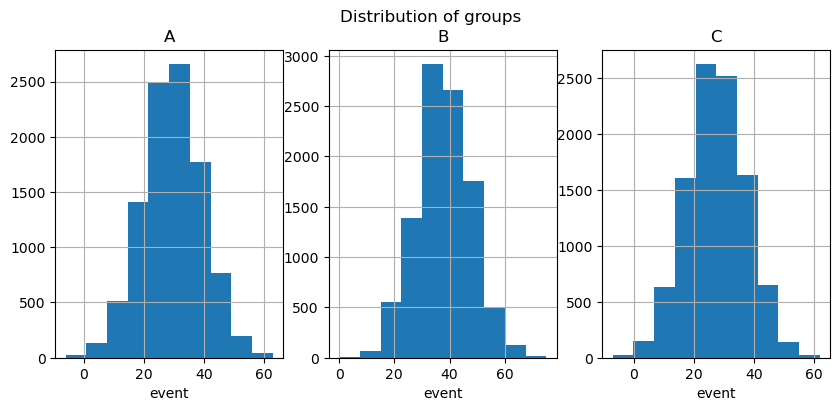

In [19]:
fig, axes = plt.subplots(1, 3, figsize=(10,4))
fig.suptitle('Distribution of groups')

df_photos[df_photos.group == 'A'].events.hist(ax=axes[0])
axes[0].set_title('A')
axes[0].set_xlabel("event")
df_photos[df_photos.group == 'B'].events.hist(ax=axes[1])
axes[1].set_title('B')
axes[1].set_xlabel("event")
df_photos[df_photos.group == 'C'].events.hist(ax=axes[2])
axes[2].set_title('C')
axes[2].set_xlabel("event")

Distrubutions look like normal. However, before testing the hypothesis of equality of means, we check the homogeneity of the groups and their size

In [24]:
# check homogeneous variances in groups
pg.homoscedasticity(df_photos, dv="events", group="group")

,W,pval,equal_var
levene,2.26226,0.104133,True


In [27]:
# check size of groups
df_photos.groupby('group', as_index=False).agg({'id':'count'})

,group,id
0,A,10000
1,B,10000
2,C,10000


In [32]:
# check normality of each distribution
pg.normality(df_photos, dv='events', group='group', method='normaltest')

,W,pval,normal
A,2.103460,0.349333,True
B,0.841072,0.656695,True
C,3.243726,0.197530,True


<AxesSubplot:title={'center':'Q-Q Plot'}, xlabel='Theoretical quantiles', ylabel='Ordered quantiles'>

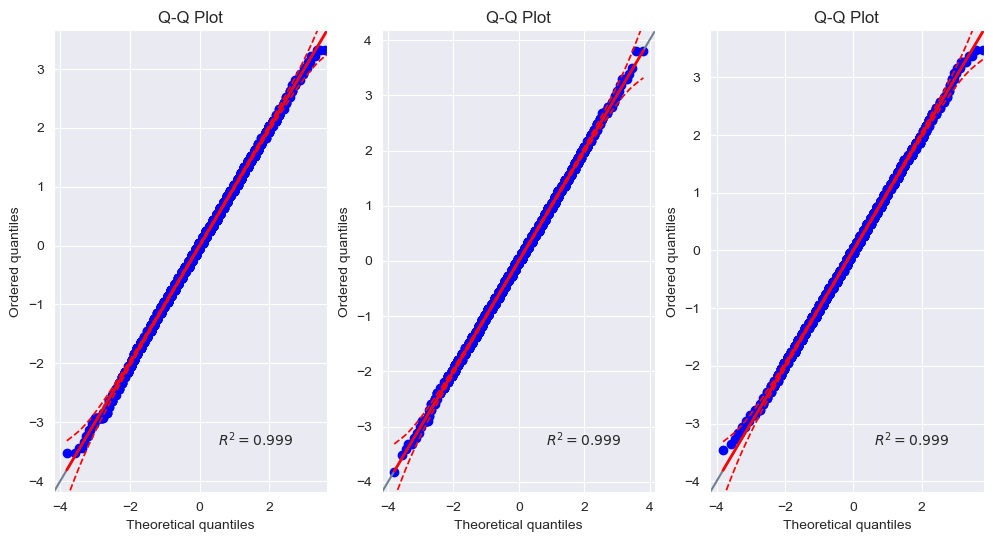

In [56]:
# check QQ-plots
sns.set_style('darkgrid')
fig, axes = plt.subplots(1, 3, figsize=(12, 6))
pg.qqplot(df_photos[df_photos.group == 'A'].events, dist='norm', ax=axes[0])
pg.qqplot(df_photos[df_photos.group == 'B'].events, dist='norm', ax=axes[1])
pg.qqplot(df_photos[df_photos.group == 'C'].events, dist='norm', ax=axes[2])

I can use anova test to check hypothese

In [59]:
df_photos.anova(dv='events', between='group', detailed=False, effsize='n2')

,Source,ddof1,ddof2,F,p-unc,n2
0,group,2,29997,2886.166657,0.0,0.161377


I reject the null hypothesis of no difference between groups. Let's find statistically significant differences between pairs of groups

In [80]:
print(pairwise_tukeyhsd(df_photos.events, df_photos.group))

Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj  lower    upper  reject
----------------------------------------------------
     A      B    8.034  -0.0   7.7038  8.3642   True
     A      C  -2.1093  -0.0  -2.4395 -1.7791   True
     B      C -10.1433  -0.0 -10.4735 -9.8131   True
----------------------------------------------------


In [78]:
df_photos.pairwise_tukey(dv='events', between='group')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,A,B,29.5796,37.6136,-8.0340,0.140894,-57.021604,0.0,-0.806377
1,A,C,29.5796,27.4703,2.1093,0.140894,14.970833,0.0,0.211712
2,B,C,37.6136,27.4703,10.1433,0.140894,71.992436,0.0,1.018089
